In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.callbacks import EarlyStopping
import keras_tuner as kt

## Data Analysis And Preprocessing

In [5]:
fraud_df = pd.read_csv("creditcard_2023.csv")

In [6]:
fraud_df.head()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0


In [7]:
fraud_df = fraud_df.drop(columns=["id"])

Check the data types for the columns and make sure there are no null values in the dataset.

In [8]:
fraud_df.dtypes

V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [9]:
fraud_df.isnull().values.any()

False

View some summary statistics of the dataset.

In [10]:
fraud_df.describe().apply(lambda x: round(x, 5))

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,568630.00000,568630.00000,568630.00000,568630.00000,568630.00000,568630.00000,568630.00000,568630.00000,568630.00000,568630.00000,...,568630.00000,568630.00000,568630.00000,568630.00000,568630.00000,568630.00000,568630.00000,568630.00000,568630.00000,568630.0
mean,-0.00000,-0.00000,-0.00000,-0.00000,0.00000,-0.00000,-0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,-0.00000,-0.00000,-0.00000,-0.00000,0.00000,12041.95763,0.5
std,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,...,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,6919.64445,0.5
min,-3.49558,-49.96657,-3.18376,-4.95122,-9.95279,-21.11111,-4.35184,-10.75634,-3.75192,-3.16328,...,-19.38252,-7.73480,-30.29545,-4.06797,-13.61263,-8.22697,-10.49863,-39.03524,50.01000,0.0
25%,-0.56529,-0.48668,-0.64930,-0.65602,-0.29350,-0.44587,-0.28353,-0.19226,-0.56874,-0.59010,...,-0.16644,-0.49049,-0.23763,-0.65158,-0.55415,-0.63189,-0.30496,-0.23188,6054.89250,0.0
50%,-0.09364,-0.13589,0.00035,-0.07376,0.08109,0.07872,0.23337,-0.11452,0.09253,0.26261,...,-0.03743,-0.02733,-0.05969,0.01590,-0.00819,-0.01189,-0.17291,-0.01393,12030.15000,0.5
75%,0.83266,0.34356,0.62854,0.70700,0.43974,0.49779,0.52595,0.04730,0.55926,0.59246,...,0.14798,0.46388,0.15572,0.70074,0.55001,0.67289,0.33402,0.40959,18036.33000,1.0
max,2.22905,4.36187,14.12583,3.20154,42.71689,26.16840,217.87304,5.95804,20.27006,31.72271,...,8.08708,12.63251,31.70763,12.96564,14.62151,5.62329,113.23109,77.25594,24039.93000,1.0


Data is already scaled to have a mean of 0 and a standard deviation of 1 except Amount, which will need to be scaled.

In [11]:
scaler = StandardScaler()
fraud_df["Amount"] = scaler.fit_transform(np.array(fraud_df["Amount"]).reshape(-1, 1))

In [12]:
fraud_df.describe().apply(lambda x: round(x, 5))

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,568630.00000,568630.00000,568630.00000,568630.00000,568630.00000,568630.00000,568630.00000,568630.00000,568630.00000,568630.00000,...,568630.00000,568630.00000,568630.00000,568630.00000,568630.00000,568630.00000,568630.00000,568630.00000,568630.00000,568630.0
mean,-0.00000,-0.00000,-0.00000,-0.00000,0.00000,-0.00000,-0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,-0.00000,-0.00000,-0.00000,-0.00000,0.00000,-0.00000,0.5
std,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,...,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,0.5
min,-3.49558,-49.96657,-3.18376,-4.95122,-9.95279,-21.11111,-4.35184,-10.75634,-3.75192,-3.16328,...,-19.38252,-7.73480,-30.29545,-4.06797,-13.61263,-8.22697,-10.49863,-39.03524,-1.73303,0.0
25%,-0.56529,-0.48668,-0.64930,-0.65602,-0.29350,-0.44587,-0.28353,-0.19226,-0.56874,-0.59010,...,-0.16644,-0.49049,-0.23763,-0.65158,-0.55415,-0.63189,-0.30496,-0.23188,-0.86523,0.0
50%,-0.09364,-0.13589,0.00035,-0.07376,0.08109,0.07872,0.23337,-0.11452,0.09253,0.26261,...,-0.03743,-0.02733,-0.05969,0.01590,-0.00819,-0.01189,-0.17291,-0.01393,-0.00171,0.5
75%,0.83266,0.34356,0.62854,0.70700,0.43974,0.49779,0.52595,0.04730,0.55926,0.59246,...,0.14798,0.46388,0.15572,0.70074,0.55001,0.67289,0.33402,0.40959,0.86628,1.0
max,2.22905,4.36187,14.12583,3.20154,42.71689,26.16840,217.87304,5.95804,20.27006,31.72271,...,8.08708,12.63251,31.70763,12.96564,14.62151,5.62329,113.23109,77.25594,1.73390,1.0


In [13]:
fraud_df["Class"].value_counts()

Class
0    284315
1    284315
Name: count, dtype: int64

It appears the data is evenly split between fradulent and non-fradulent transactions. This means that error metrics like accuracy will be good test for our model.

Perform principal componenet analysis on a random sample of the data for visualization purposes.

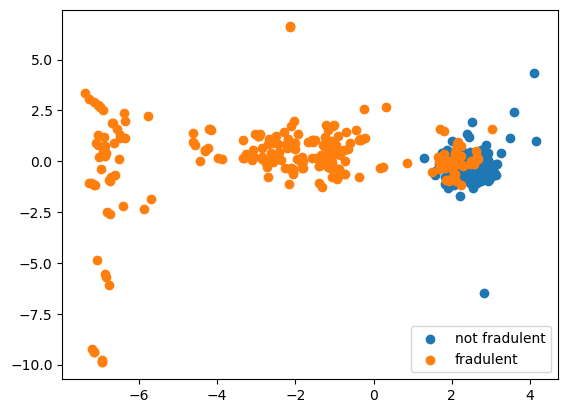

In [14]:
pca = PCA(2)
twod = pca.fit_transform(fraud_df.iloc[:, :-1])
twod = pd.DataFrame(np.c_[twod, fraud_df.iloc[:, -1]]).sample(500)
twod.columns = ["one", "two", "class"]
twod_n = twod[twod["class"] == 0.0]
twod_f = twod[twod["class"] == 1.0]
plt.scatter(twod_n["one"], twod_n["two"], label="not fradulent");
plt.scatter(twod_f["one"], twod_f["two"], label="fradulent");
plt.legend(loc="lower right");

It appears non-fradulent transactions are mostly all clustured around one point, while fradulent transactions have much more variation.

Make a heat map to find and potentially drop features that are correlated with each other.

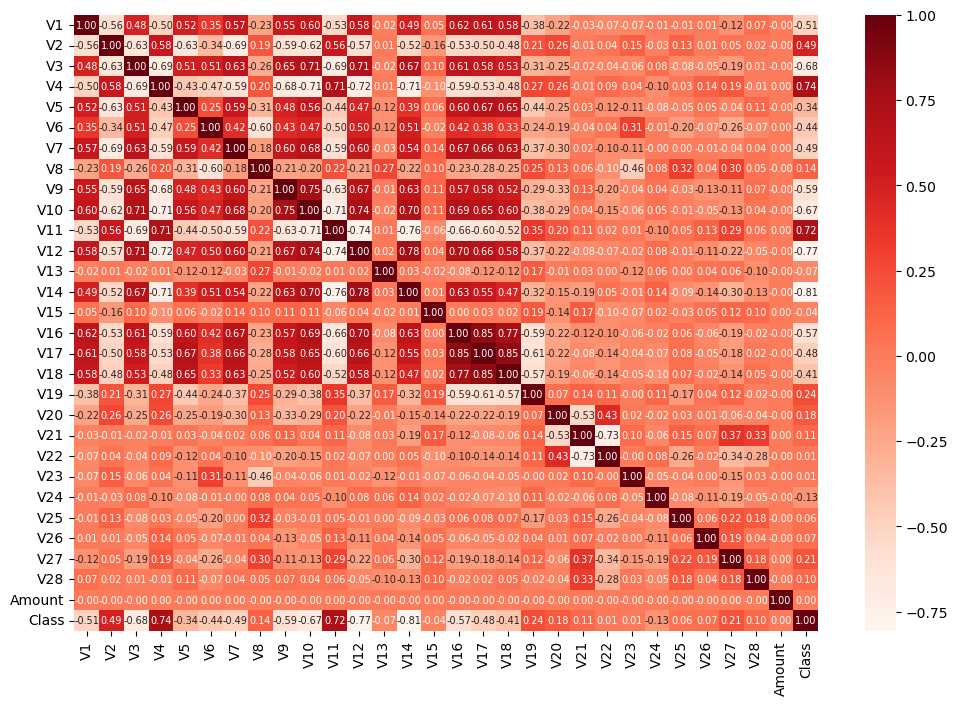

In [15]:
corr = fraud_df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr, cmap="Reds", annot=True, annot_kws={"fontsize":7}, fmt=".2f");

In [16]:
X = np.array(fraud_df.drop(columns="Class"))
Y = np.array(fraud_df["Class"])

Split data into test and training sets.

In [17]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [18]:
x_train.shape

(454904, 29)

In [19]:
x_test.shape

(113726, 29)

## Model Building

In [63]:
es = EarlyStopping(monitor="loss", mode="min", patience=2, restore_best_weights=True)

In [70]:
model = Sequential([
    Dense(100, activation="relu"),
    Dropout(0.1),
    Dense(10, activation="relu"),
    Dropout(0.1),
    Dense(1, activation="sigmoid")
])

In [71]:
model.compile(optimizer=Adam(learning_rate=0.001),
              loss=BinaryCrossentropy(),
              metrics=["accuracy"]
             )

In [72]:
history = model.fit(x_train, y_train, epochs=20, callbacks=[es], validation_data=(x_test, y_test), batch_size=256)

Epoch 1/20
1777/1777 [==============================] - 14s 7ms/step - loss: 0.0757 - accuracy: 0.9724 - val_loss: 0.0211 - val_accuracy: 0.9937
Epoch 2/20
1777/1777 [==============================] - 11s 6ms/step - loss: 0.0188 - accuracy: 0.9944 - val_loss: 0.0076 - val_accuracy: 0.9986
Epoch 3/20
1777/1777 [==============================] - 12s 7ms/step - loss: 0.0107 - accuracy: 0.9972 - val_loss: 0.0050 - val_accuracy: 0.9989
Epoch 4/20
1777/1777 [==============================] - 21s 12ms/step - loss: 0.0079 - accuracy: 0.9981 - val_loss: 0.0038 - val_accuracy: 0.9992
Epoch 5/20
1777/1777 [==============================] - 20s 11ms/step - loss: 0.0068 - accuracy: 0.9984 - val_loss: 0.0034 - val_accuracy: 0.9993
Epoch 6/20
1777/1777 [==============================] - 18s 10ms/step - loss: 0.0058 - accuracy: 0.9986 - val_loss: 0.0028 - val_accuracy: 0.9994
Epoch 7/20
1777/1777 [==============================] - 13s 8ms/step - loss: 0.0049 - accuracy: 0.9988 - val_loss: 0.0028 - val

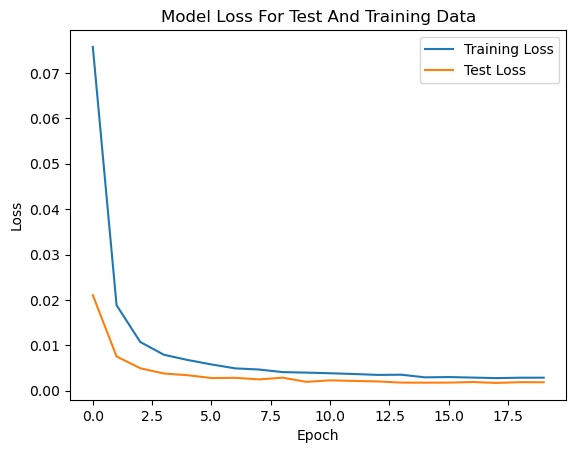

In [73]:
plt.plot(range(20), history.history["loss"], label="Training Loss");
plt.plot(range(20), history.history["val_loss"], label="Test Loss");
plt.title("Model Loss For Test And Training Data")
plt.xlabel("Epoch");
plt.ylabel("Loss");
plt.legend();

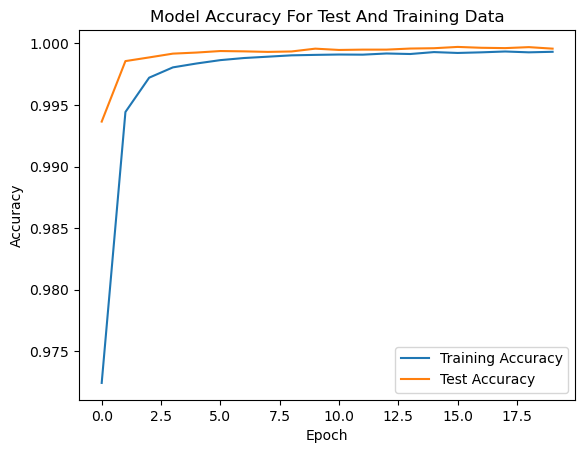

In [74]:
plt.plot(range(20), history.history["accuracy"], label="Training Accuracy");
plt.plot(range(20), history.history["val_accuracy"], label="Test Accuracy");
plt.title("Model Accuracy For Test And Training Data")
plt.xlabel("Epoch");
plt.ylabel("Accuracy");
plt.legend();

Model seems to be performing with very high accuracy, and the difference between training and test accuracy is very low, indicating model is not overfitting data.